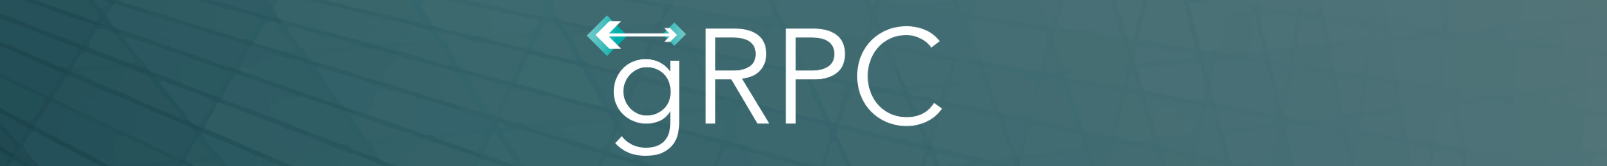

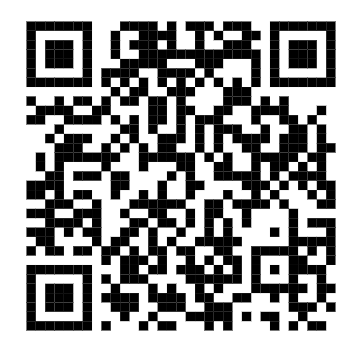

# LINK
- https://grpc.io/

# What's gRPC
- gRPC (Google Protocol Remote Procedure Call)
- gRPC คือ framework ที่ช่วยให้เราคุยกันข้ามเครื่องได้ ทำงานบน Protocal HTTP/2 จึงทำให้มันทำงานได้อย่าง high performance 
- gRPC รองรับได้หลายภาษามากๆ หนึ่งในนั้นก็คือ Node.js Python C#
- ยิ่งไปกว่านั้นยังรองรับทั้งการเขียนแบบ synchronous และ asynchronous
- และยังสามารถทำงานแบบ Bi-directional streaming

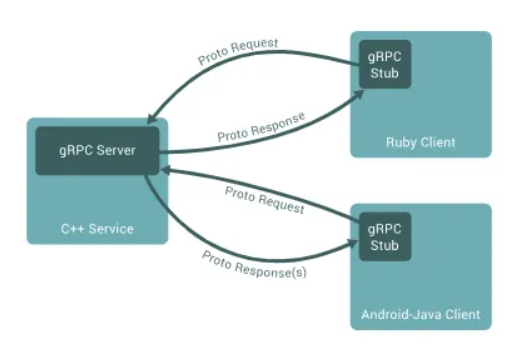

In [ ]:
#conda install -n grpc ipykernel --update-deps --force-reinstall

In [2]:
%pip install grpcio
%pip install grpcio-tools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 23.6 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 6.0 MB/s eta 0:00:00a 0:00:01m
Note: you may need to restart the kernel to use updated packages.


# Proto file
- https://protobuf.dev/programming-guides/proto3/
- Protobuf คืออะไร พูดง่ายๆให้นึกถึง JSON หรือ XML เพียงแต่มันเล็กกว่าเพราะมันจัดเก็บข้อมูลเป็น Binary 

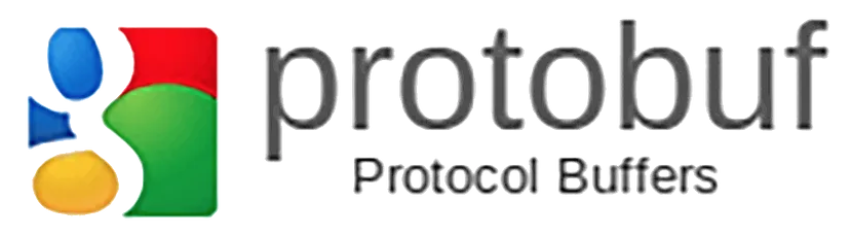

In [7]:
%%writefile ../protos/helloworld.proto
syntax = "proto3";
package helloworld;

// The greeting service definition.
service Greeter {
  // Sends a greeting
  rpc SayHello (HelloRequest) returns (HelloReply) {}
}

// The request message containing the user's name.
message HelloRequest {
  string name = 1;
}

// The response message containing the greetings
message HelloReply {
  string message = 1;
}


Overwriting ../protos/chatbot.proto


In [4]:
! python -m grpc_tools.protoc -I ../../protos/ --python_out=. --grpc_python_out=. helloworld.proto


# Server

In [10]:
%%writefile server.py
from concurrent import futures
import logging

import grpc
import helloworld_pb2
import helloworld_pb2_grpc


class Greeter(helloworld_pb2_grpc.Greeter):

    def SayHello(self, request, context):
        print(request.name)
        return helloworld_pb2.HelloReply(message='Hello, %s!' % request.name)

def serve():
    server = grpc.server(futures.ThreadPoolExecutor(max_workers=10))
    helloworld_pb2_grpc.add_GreeterServicer_to_server(Greeter(), server)
    server.add_insecure_port('[::]:8099')
    server.start()
    server.wait_for_termination()


if __name__ == '__main__':
    logging.basicConfig()
    serve()

Overwriting server.py


# Client

In [17]:
from __future__ import print_function
import logging
import grpc
import helloworld_pb2
import helloworld_pb2_grpc

def run():
    with grpc.insecure_channel('localhost:50011') as channel:
        stub = helloworld_pb2_grpc.GreeterStub(channel)
        response = stub.SayHello(helloworld_pb2.HelloRequest(name='blue'))
    print("Chat client received: " + response.message)

logging.basicConfig()
run()


Chat client received: Hello, blue!
